# Analiziranje planetov in lun 1.del


V tej datoteki analiziramo podatke iz spletne strani https://en.wikipedia.org/wiki/List_of_Star_Wars_planets_and_moons. V analizi nastopa 242 primerkov(planetov in lun), za vsakega ločimo 5 kategorij (ime, vrsta, prva upodobitev, leto prve upodobitve, kratek opis):

In [11]:
import os
import pandas as pd

podatki_obdelani = 'CSV datoteke'
csv_1 = 'planeti-lune-1.csv'
pd.set_option("display.max_rows", 12) # Št. vrstic


path_1 = os.path.join(podatki_obdelani, csv_1)
planeti1 = pd.read_csv(path_1)
planeti1.index += 1

## 1. Osnovne informacije

### 1.1 Tabela podatkov

In [12]:
planeti1

,Ime,Vrsta,Prva upodobitev,Leto prve upodobitve,Kratek opis
1,Abafar,planet,Star Wars: The Clone Wars,2012,"Puščavski planet, ki se nahaja v zunanjem robu..."
2,Agamar,planet,Star Wars Legends:The Farlander Papers,1993,"Pust, skalnat planet v zunanjem robu.Mesto še ..."
3,Ahch-To,planet,The Force Awakens,2015,"Velik oceanski planet, na katerem se že več le..."
4,Ajan Kloss,luna,Star Wars Battlefront II,2017,"Luna v džungli, ki služi kot nova baza za oper..."
5,Akiva,planet,Star Wars: Aftermath,2015,Planet džungle in dom Norra in Temmin Wexley t...
...,...,...,...,...,...
238,Wrea,planet,Star Wars Legends:The New Rebellion,1996,"Planet v bližini asteroidnega polja, kjer Saw ..."
239,Yavin,planet,Star Wars,1977,"Plinski planet z več lunami, vključno z Yavino..."
240,Yavin 4,luna,Star Wars,1977,Gozdna luna in baza za uporniško zvezo.
241,Zeffo,planet,Star Wars Jedi: Fallen Order,2019,Planet s številnimi gorami in nevihtnim vremen...


### 1.2 Statistika


Prikazani so statistični podatki o prvem letu upodobitve (to je edini podatek za katerega lahko to sploh definiramo):

In [6]:
planeti1.describe().round()

,Leto prve upodobitve
count,242.0
mean,2005.0
std,14.0
min,1977.0
25%,1996.0
50%,2007.0
75%,2016.0
max,2023.0


## 2. Tabele


V tem razdelku je s tabeli predstvaljenih nekaj informacij, ki so se mi zdele zanimive:


### 2.1 Pogostost začetnic

Katera črka prevlada v poimenovanju planetov in lun?

In [65]:
zacetnice_ponovitve = {}
for i in "ABCDEFGHIJKLMNOPRSTUVWXYZ": # Zadošča angleška abeceda (imen planetov ne slovenimo)
    zacetnice_ponovitve[i] = 0
    for j in planeti1['Ime']:
        if i == j[0]:
            zacetnice_ponovitve[i] += 1
            
zacetnice = {'začetnice':list(zacetnice_ponovitve.keys()), 'ponovitve':list(zacetnice_ponovitve.values())}
zacetnice_pd = pd.DataFrame.from_dict(zacetnice)
zacetnice_pd = zacetnice_pd.set_index(['začetnice'])

In [66]:
# Izpis tabele
zacetnice_pd

,ponovitve
začetnice,
A,26
B,12
C,18
D,12
E,14
...,...
V,4
W,4
X,0


Med 242 planeti in lunami z naskokom prevlada začetnica A, medtem ko se črka x sploh ne pojavi.

### 2.2 V katerih serijah/filmih je največ prvih pojavitev planetov in lun?

Zanimalo me je v katerih serijah/filmih se pojavijo prvič planeti in lune in kje je le teh največ:

In [63]:
def najpogostejsa_upodobitev(podatki):
    upodobitve = {}  # Slovar za shranjevanje števila upodobitev vsakega filma/serije

    for index, planet in podatki.iterrows():
        upodobitev = planet['Prva upodobitev']

        if upodobitev in upodobitve:
            upodobitve[upodobitev] += 1
        else:
            upodobitve[upodobitev] = 1
    
    return upodobitve

# število upodobitev v tabeli planeti1
upodobitve_planet1 = najpogostejsa_upodobitev(planeti1)

# Podatki za tabelo
podatki_tabela = {
    'Upodobitev': list(upodobitve_planet1.keys()),
    'Število planetov': list(upodobitve_planet1.values())
}

# Ustvarimo tabelo iz podatkov
tabela = pd.DataFrame(podatki_tabela)


In [64]:
# Izpis tabele
tabela

,Upodobitev,Število planetov
0,Star Wars: The Clone Wars,28
1,Star Wars Legends:The Farlander Papers,2
2,The Force Awakens,12
3,Star Wars Battlefront II,6
4,Star Wars: Aftermath,2
...,...,...
57,Star Wars Legends:Darth Bane: Rule of Two,2
58,Star Wars Squadrons,2
59,The Clone Wars,2
60,Star Wars Legends:The Mandalorian Armor,2


Rezultati so dokaj pričakovani (saj kar se tiče prvega mesta). The clone wars je animirana serija, ki obsega 7 sezon in več kot 54 ur watch time-a.

### 2.3 Strukture planetov

V naslednji analizi ločimo planete glede na njihovo strukturo, podnebje, rastje ipd.

In [70]:
def struktura(planeti1):

    # Nekaj ključnih besed za vsako kategorijo
    kategorije = {
        'puščavski': ['puščav', 'pesek', 'vročina'],
        'skalnat': ['skale', 'kamnine', 'gorat'],
        'oceanski': ['ocean', 'morje', 'vodni'],
        'gozdni': ['gozd', 'rastje', 'drevesa', 'gozdovi'],
        'plinski': ['plin', 'atmosfera', 'plinski oblaki'],
        'močvirni': ['močvirje', 'blato', 'vodni habitati'],
        'suh': ['suh', 'pomanjkanje vode', 'peščena tla'],
        'travnat': ['travnik', 'travnata površina', 'zeleno'],
        'ledeni': ['led', 'mrzlo', 'ledena površina'],
        'industrijski': ['industrija', 'mesta', 'urban'],
        'vulkanski': ['vulkan', 'lava', 'aktivni vulkani'],
        'džungla': ['rastje', 'džungli']
    }

    # Stolpec 'Kategorije'
    planeti1['Kategorije'] = ''

    # Kategorizacija planetov glede na ključne besede
    for index, row in planeti1.iterrows():
        opis = row['Kratek opis']

    # Iskanje kategorij glede na ključne besede v opisu
    kategorizirane_kategorije = []
    for kategorija, kljucne_besede in kategorije.items():
        for beseda in kljucne_besede:
            if beseda in opis:
                kategorizirane_kategorije.append(kategorija)
                break

    planeti1.at[index, 'Kategorije'] = ', '.join(kategorizirane_kategorije)

    return planeti1

# Izračuna št. planetov v vsaki kategoriji
stevilo_planetov_po_kategorijah = planeti1['Kategorije'].str.split(', ').explode().value_counts()

# Podatki v tabelo
tabela_stevila_planetov = pd.DataFrame({'Struktura': stevilo_planetov_po_kategorijah.index, 'Stevilo planetov': stevilo_planetov_po_kategorijah.values})

    

In [71]:
# Izpis tabele
tabela_stevila_planetov

,Struktura,Stevilo planetov
0,,178
1,puščavski,12
2,oceanski,10
3,ledeni,10
4,plinski,8
5,industrijski,8
6,skalnat,8
7,džungla,6
8,gozdni,6
9,vulkanski,2


Pomankljivost programa: Med navedenimi ključnimi besedami zazna le 64 planetov. Razlogov zato je več, prevladujeta pa gotovo skromnost opisov in sklanjanje besed.

### 2.4 Koliko je planetov in koliko lun?

In [67]:
def stevilo_planetov_lun(planeti1):

    # Št. pojavitev
    stevilo_pojavitev = planeti1['Vrsta'].value_counts()

    # Tabela
    tabela_stevila_pojavitev = pd.DataFrame({'Vrsta': stevilo_pojavitev.index, 'Število pojavitev': stevilo_pojavitev.values})

    return tabela_stevila_pojavitev

tabela_stevila = stevilo_planetov_lun(planeti1)

In [68]:
# Izpis tabele
tabela_stevila


,Vrsta,Število pojavitev
0,planet,198
1,luna,44


Opomba: Ponovno skromnost opisov ne da povsem točne slike (po vsej verjetnosti). V ekstrakciji smo planete in lune ločili na podlagi ključne besede 'planet' v opisu, a ker so le ti pomakljivi lahko pride do odstopanj.

## 3. Grafi in diagrami

In [75]:
import matplotlib.pyplot as plt

V tem delu bomo zgornje podatke predstavili še grafično:

### 3.1 Pogostost začetnic


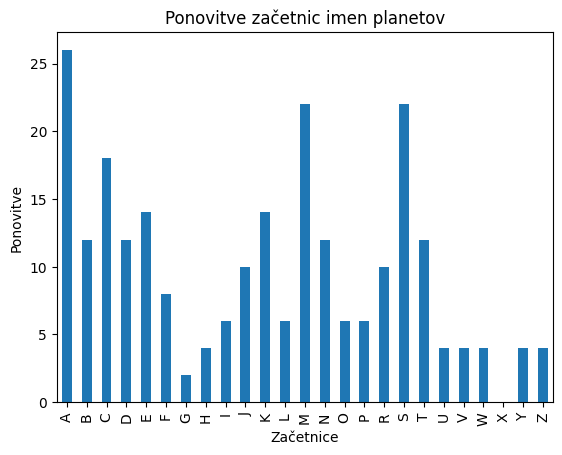

In [76]:
zacetnice_pd.plot(kind='bar', legend=False)
plt.xlabel('Začetnice')
plt.ylabel('Ponovitve')
plt.title('Ponovitve začetnic imen planetov')
plt.show()

### 3.2 V katerih serijah/filmih je največ prvih pojavitev planetov in lun?

Najprej definirajmo funkcijo, ki bo naslove filmov in serij pretvorila v kratice, kar nam bo pomagalo pri lažji grafični upodobitvi:

In [149]:
def naredi_kratice(podatki):
    kratice = []
    
    for index, planet in podatki.iterrows():
        upodobitev = planet['Prva upodobitev']
        besede = upodobitev.split()
        kratice_besed = [beseda[0] for beseda in besede]
        
        kratika = ''.join(kratice_besed)
        kratice.append(kratika)
    
    return kratice

In [150]:
# Test
kratice = naredi_kratice(planeti1)
for kratica in kratice:
    print(kratica)

SWTCW
SWLFP
TFA
SWBI
SWA
ANH
A
SWTCW
SWLKIJO
SWLWEaW
SWLFR
TESB
SWR
TBB
SWTCW
TA
TESB
SWJFO
SWJFO
TLJ
SWR
SWLMS
SWLTaB
SWTCW
SWLLOSTToBF
ANH
SWLttE
LPoA
OK
TFA
TESB
ANH
SWLCoPL
SWLftMEC
RO
RotJ
RotJ
SWC
SWLMS
SWLIA
TRoS
RotS
A
SWTCW
SWLVS
AotC
TFA
TESB
TPM
SWLQPtT
SWLWEIJDM
SWLWR
TFA
RO
SWLS
RotS
AotC
SWHS
TRoS
SW
TRoS
SWJS
SWLG
CARON
SWR
SWTCW
SWLWKotORITSL
TPM
SWLSW
OK
SWLWE
SWLotME
SWLE
SWTCW
SWTCW
RotS
RotS
TPM
SWLE
TM
A
SASWS
SWJFO
SWLotJ
TESB
TFA
TRoS
SWBI
RotS
SWLFR
SWLotE
SWTCW
SWLWJKDFI
SWLfJP
RotS
SWLWAJ9
SWBOS
A
SWLBRoT
SWTCW
SWS
SWTCW
TM
AotC
RotJ
TFA
SWJS
ANH
TCW
SWTCW
SWLMA
SWTCW
RotS
SASWS
SWBI
RO
SWLNR
SW
SW
SWJFO
SWTCW
SWTCW
SWLFP
TFA
SWBI
SWA
ANH
A
SWTCW
SWLKIJO
SWLWEaW
SWLFR
TESB
SWR
TBB
SWTCW
TA
TESB
SWJFO
SWJFO
TLJ
SWR
SWLMS
SWLTaB
SWTCW
SWLLOSTToBF
ANH
SWLttE
LPoA
OK
TFA
TESB
ANH
SWLCoPL
SWLftMEC
RO
RotJ
RotJ
SWC
SWLMS
SWLIA
TRoS
RotS
A
SWTCW
SWLVS
AotC
TFA
TESB
TPM
SWLQPtT
SWLWEIJDM
SWLWR
TFA
RO
SWLS
RotS
AotC
SWHS
TRoS
SW
TRoS
SWJS
SWLG
CARON
SWR
SWTCW
SWLWKotOR

Sedaj pa lahko podatke predstavimo grafično:

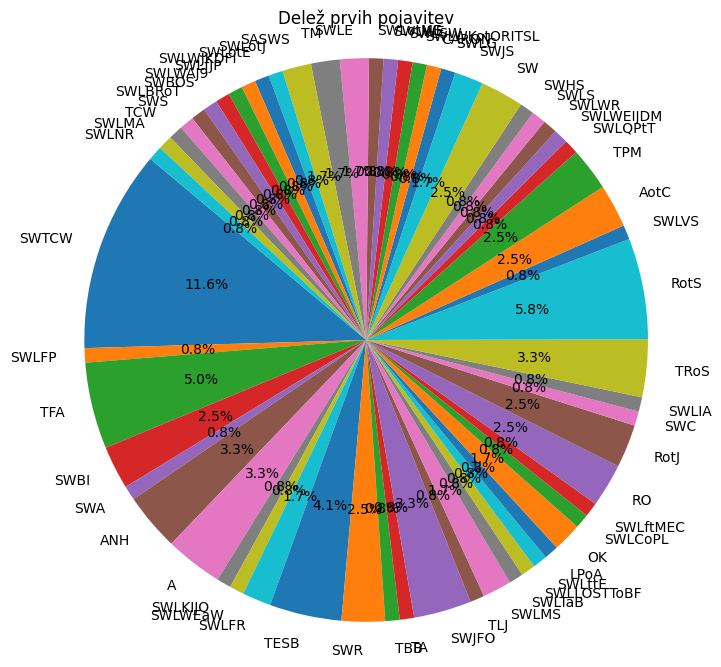

In [153]:
from collections import Counter

# Kratice
kratice = naredi_kratice(planeti1)

# Ustvarimo števec, ki prešteje število pojavitev vsake kratice
kratice_counter = Counter(kratice)

# Podatki
unique_kratice = list(kratice_counter.keys())
counts = list(kratice_counter.values())

# Tortni diagram
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=unique_kratice, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Da bo diagram krog
plt.title('Delež prvih pojavitev')
plt.show()


Očitno zmeda še vedno ostaja, a po mnogih poskusih se je tortni diagram izkazal za najboljšo rešitev

### 3.3 Strukture planetov

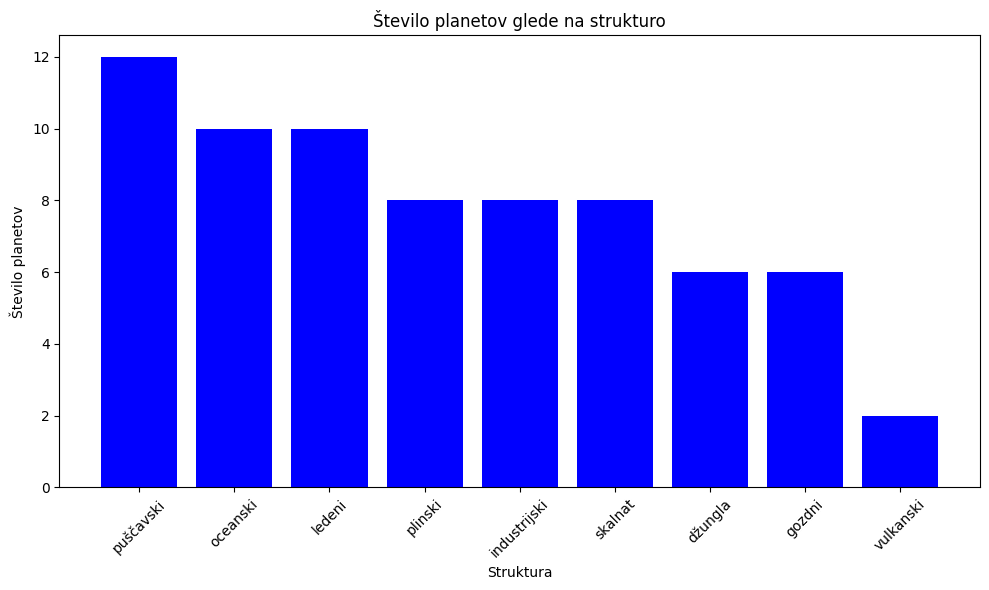

In [162]:
podatki = {
    'Struktura': ['puščavski', 'oceanski', 'ledeni', 'plinski', 'industrijski', 'skalnat', 'džungla', 'gozdni', 'vulkanski'],
    'Stevilo planetov': [12, 10, 10, 8, 8, 8, 6, 6, 2]
}

# Pretvorba v DataFrame
df = pd.DataFrame(podatki)

# Stolpični diagram
plt.figure(figsize=(10, 6))
plt.bar(df['Struktura'], df['Stevilo planetov'], color='blue')
plt.xlabel('Struktura')
plt.ylabel('Število planetov')
plt.title('Število planetov glede na strukturo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
